In [59]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2. Load Dataset
df = pd.read_csv("household_power_consumption.csv", sep=',', na_values='?', low_memory=False)
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df.drop(columns=['Date', 'Time'], inplace=True)

In [60]:
#Initial Data Exploration
print(df.head())
#print(df.info())
#print(df.describe())
#print(df.isnull().sum())

   Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3            Datetime  
0             0.0             1.0            17.0 2006-12-16 17:24:00  
1             0.0             1.0            16.0 2006-12-16 17:25:00  
2             0.0             2.0            17.0 2006-12-16 17:26:00  
3             0.0             1.0            17.0 2006-12-16 17:27:00  
4             0.0             1.0            17.0 2006-12-16 17:28:00  


In [61]:
# Convert to numeric
for col in df.columns[:-1]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values
df.fillna(method='ffill', inplace=True)

# Set index
df.set_index('Datetime', inplace=True)

# 3. OUTLIER HANDLING using IQR
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

for col in df.columns:
    df = remove_outliers_iqr(df, col)

# 4. SKEWNESS CORRECTION (log1p for right-skewed)
for col in df.columns:
    if df[col].skew() > 1:
        df[col] = np.log1p(df[col])


C:\Users\INDIA\AppData\Local\Temp\ipykernel_9932\3025935877.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [62]:
# 5. Feature Engineering
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['weekday'] = df.index.weekday
df['weekend'] = (df['weekday'] >= 5).astype(int)
df['rolling_avg_1h'] = df['Global_active_power'].rolling(window=60, min_periods=1).mean()

# Fill any new NA created
df.fillna(method='bfill', inplace=True)

C:\Users\INDIA\AppData\Local\Temp\ipykernel_9932\1489619392.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


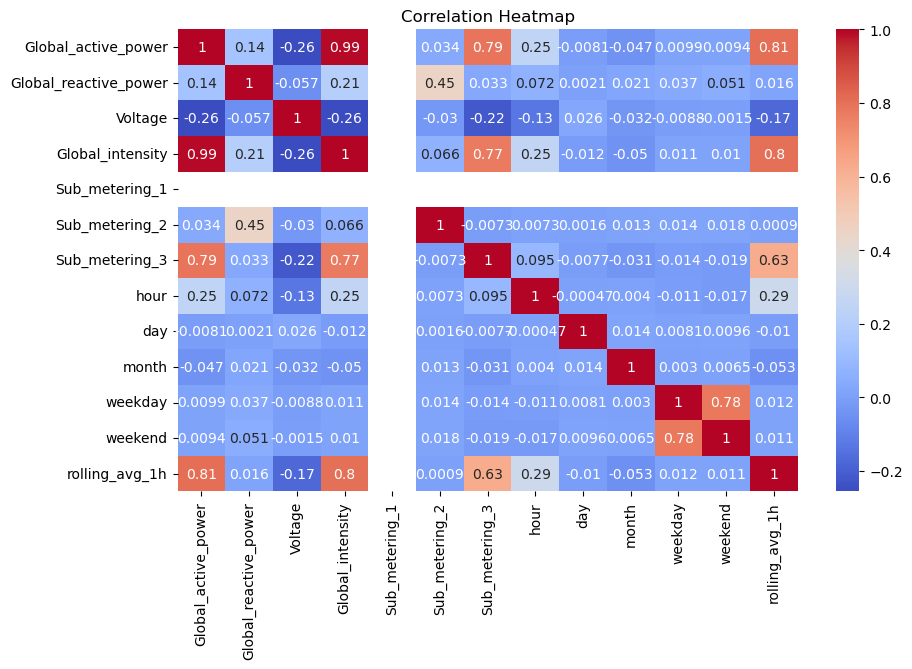

In [63]:
# 6. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [64]:
# 7. Define Features and Target
features = ['Global_reactive_power', 'Voltage', 'Global_intensity',
            'hour', 'day', 'month', 'weekday', 'weekend', 'rolling_avg_1h']
target = 'Global_active_power'

X = df[features]
y = df[target]

In [65]:
# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
# 10. Model Imports and Metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

results = {}

In [ ]:
# Random Forest
rf = RandomForestRegressor(n_estimators=30, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
results['Random Forest'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, rf_pred)),
    'MAE': mean_absolute_error(y_test, rf_pred),
    'R2': r2_score(y_test, rf_pred)
}
print("\nRandom Forest")
print(f"RMSE: {results['Random Forest']['RMSE']:.3f}")
print(f"MAE: {results['Random Forest']['MAE']:.3f}")
print(f"R2 Score: {results['Random Forest']['R2']:.3f}")

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
results['Linear Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, lr_pred)),
    'MAE': mean_absolute_error(y_test, lr_pred),
    'R2': r2_score(y_test, lr_pred)
}
print("\nLinear Regression")
print(f"RMSE: {results['Linear Regression']['RMSE']:.3f}")
print(f"MAE: {results['Linear Regression']['MAE']:.3f}")
print(f"R2 Score: {results['Linear Regression']['R2']:.3f}")


In [ ]:
# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=30, random_state=42)
gb.fit(X_train_scaled, y_train)
gb_pred = gb.predict(X_test_scaled)
results['Gradient Boosting'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, gb_pred)),
    'MAE': mean_absolute_error(y_test, gb_pred),
    'R2': r2_score(y_test, gb_pred)
}
print("\nGradient Boosting")
print(f"RMSE: {results['Gradient Boosting']['RMSE']:.3f}")
print(f"MAE: {results['Gradient Boosting']['MAE']:.3f}")
print(f"R2 Score: {results['Gradient Boosting']['R2']:.3f}")


In [ ]:
# Neural Network
nn = MLPRegressor(hidden_layer_sizes=(50,), max_iter=200, early_stopping=True, random_state=42)
nn.fit(X_train_scaled, y_train)
nn_pred = nn.predict(X_test_scaled)
results['Neural Network'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, nn_pred)),
    'MAE': mean_absolute_error(y_test, nn_pred),
    'R2': r2_score(y_test, nn_pred)
}
print("\nNeural Network")
print(f"RMSE: {results['Neural Network']['RMSE']:.3f}")
print(f"MAE: {results['Neural Network']['MAE']:.3f}")
print(f"R2 Score: {results['Neural Network']['R2']:.3f}")

In [ ]:
# Using a small sample of X_test for speed
X_sample = X_test.sample(n=500, random_state=42)
y_sample = y_test.loc[X_sample.index]

rf_model = RandomForestRegressor(n_estimators=20, random_state=42, n_jobs=-1)
rf_model.fit(X_sample, y_sample)

# Now plot importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance - Sampled RF")
plt.tight_layout()
plt.show()

In [ ]:
# 12. Summary Table
summary_df = pd.DataFrame(results).T
print("\nModel Performance Summary:")
print(summary_df)